In [1]:
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
train_features = pd.read_csv('TrainFeatures.csv')
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
train_labels = pd.read_csv('TrainLabels.csv')
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
# add labels column to train dataframe (to make sure the order on instance is the same)
train_features['status_group'] = train_features.id.map(train_labels.set_index('id')['status_group'])
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# Data Preprocessing
## 1. handle missing values

In [5]:
train_features.count()

id                       59400
amount_tsh               59400
date_recorded            59400
funder                   55765
gps_height               59400
installer                55745
longitude                59400
latitude                 59400
wpt_name                 59400
num_private              59400
basin                    59400
subvillage               59029
region                   59400
region_code              59400
district_code            59400
lga                      59400
ward                     59400
population               59400
public_meeting           56066
recorded_by              59400
scheme_management        55523
scheme_name              31234
permit                   56344
construction_year        59400
extraction_type          59400
extraction_type_group    59400
extraction_type_class    59400
management               59400
management_group         59400
payment                  59400
payment_type             59400
water_quality            59400
quality_

### a. funder

In [6]:
train_features.funder.value_counts(dropna=False)

Government Of Tanzania    9084
NaN                       3635
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Rarymond Ekura               1
Justine Marwa                1
Municipal Council            1
Afdp                         1
Samlo                        1
Name: funder, Length: 1898, dtype: int64

One possible option to impute missing values of this feature is simply by adding a new category "unknown", as the number of missing values is relatively small but considerable comparing with other value counts.

In [7]:
train_features.funder.fillna("unknown_funder",inplace=True)

### b. installer

In [8]:
train_features.installer.value_counts(dropna=False)

DWE                17402
NaN                 3655
Government          1825
RWE                 1206
Commu               1060
                   ...  
Wizara  ya maji        1
TWESS                  1
Nasan workers          1
R                      1
SELEPTA                1
Name: installer, Length: 2146, dtype: int64

In [9]:
len(train_features.installer) - train_features.installer.count()

3655

for the same previous reasons, a possible option to impute missing values of this feature is simply by adding a new category "unknown"

In [10]:
train_features.installer.fillna("unknown_installer",inplace=True)

### c. subvillage

In [11]:
subvillage_counts = train_features.subvillage.value_counts(dropna=False)
subvillage_counts

Madukani        508
Shuleni         506
Majengo         502
Kati            373
NaN             371
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: subvillage, Length: 19288, dtype: int64

In [12]:
subvillage_counts.mean()

3.079635006221485

In [13]:
subvillage_counts.median()

2.0

this feature is too sparse, the most frequent value is not more than 1% of the total data size. Moreover, there are a large number of categories ~ 20000 so encoding them in (59400,20000) binary matrix will be so sparse. what if we select only the top k categories and gather all the others in a category called 'others'?

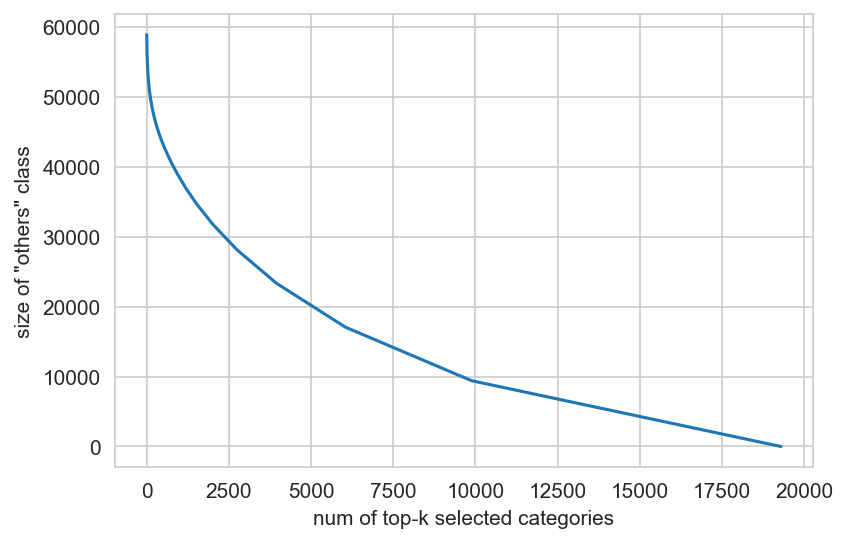

In [15]:
num_of_selected_categories = np.arange(1,len(train_features.subvillage.value_counts(dropna=False).values)+1)
size_of_others_class = len(train_features) - np.cumsum(train_features.subvillage.value_counts(dropna=False).values)
plt.figure(dpi=150)
plt.plot(num_of_selected_categories,size_of_others_class);
plt.xlabel('num of top-k selected categories')
plt.ylabel('size of "others" class');

In the plot above, it can be concluded that if 2500 top frequent subvillages were encoded, the "others" class would be the dominant class with almost half of the data size. To sum up, dropping this feature seems rational.

In [16]:
train_features.drop(['subvillage'],axis=1,inplace=True)

### d. public_meeting

In [17]:
train_features.public_meeting.value_counts(dropna=False)

True     51011
False     5055
NaN       3334
Name: public_meeting, dtype: int64

In [18]:
len(train_features) - train_features.public_meeting.count()

3334

This seems confusing, adding a new class will change the data type (boolean -> categorical) but dropping this large number of instances is surely unrecommended

In [19]:
train_features.public_meeting.fillna('unknown_public_meeting',inplace=True)

### e. scheme_management and sheme_name

In [20]:
train_features.scheme_management.value_counts(dropna=False)

VWC                 36793
WUG                  5206
NaN                  3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [21]:
train_features.scheme_management.fillna('unknown_scheme_management',inplace=True)

In [22]:
train_features.scheme_name.value_counts(dropna=False)

NaN                        28166
K                            682
None                         644
Borehole                     546
Chalinze wate                405
                           ...  
Visiga water supplly           1
Emanyata pipelines             1
Magundi water supply           1
Imalampaka water supply        1
Mtawanya                       1
Name: scheme_name, Length: 2697, dtype: int64

Dropping this feature is justifiable, NaN is the most common class, and other classes have relatively low frequencies, and they are too many.

In [23]:
train_features.drop(['scheme_name'],axis=1,inplace=True)

### f. permit

In [24]:
train_features.permit.value_counts(dropna=False)

True     38852
False    17492
NaN       3056
Name: permit, dtype: int64

In [25]:
train_features.permit.fillna('unknown_permit',inplace=True)

let's take a final look on counts

In [26]:
train_features.count()

id                       59400
amount_tsh               59400
date_recorded            59400
funder                   59400
gps_height               59400
installer                59400
longitude                59400
latitude                 59400
wpt_name                 59400
num_private              59400
basin                    59400
region                   59400
region_code              59400
district_code            59400
lga                      59400
ward                     59400
population               59400
public_meeting           59400
recorded_by              59400
scheme_management        59400
permit                   59400
construction_year        59400
extraction_type          59400
extraction_type_group    59400
extraction_type_class    59400
management               59400
management_group         59400
payment                  59400
payment_type             59400
water_quality            59400
quality_group            59400
quantity                 59400
quantity